In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-lifestyle-dataset/student_lifestyle_dataset.csv


Pre processing

Welcome in my notebook in which we will try to discover what students with over than average GPA are having in common.

In [2]:
file_path = '/kaggle/input/student-lifestyle-dataset/student_lifestyle_dataset.csv'

#making the index from student_ID
df = pd.read_csv(file_path, index_col=0)

#First look at the data
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
Student_ID,,,,,,,
1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
2,5.3,3.5,8.0,4.2,3.0,2.75,Low
3,5.1,3.9,9.2,1.2,4.6,2.67,Low
4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [3]:
#Basic indicators
df.shape

(2000, 7)

In [4]:
#checking missing values
df.isnull().sum()

Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

In [5]:
df.columns

Index(['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

In [6]:
df.describe()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


Discovering the distribution of GPA

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


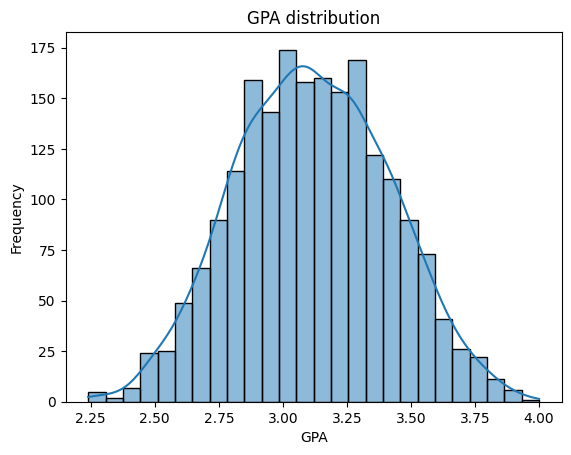

In [7]:
sns.histplot(df['GPA'], kde=True)
plt.title("GPA distribution")
plt.xlabel("GPA")
plt.ylabel("Frequency")
plt.show()

What is correlated with high GPA? 

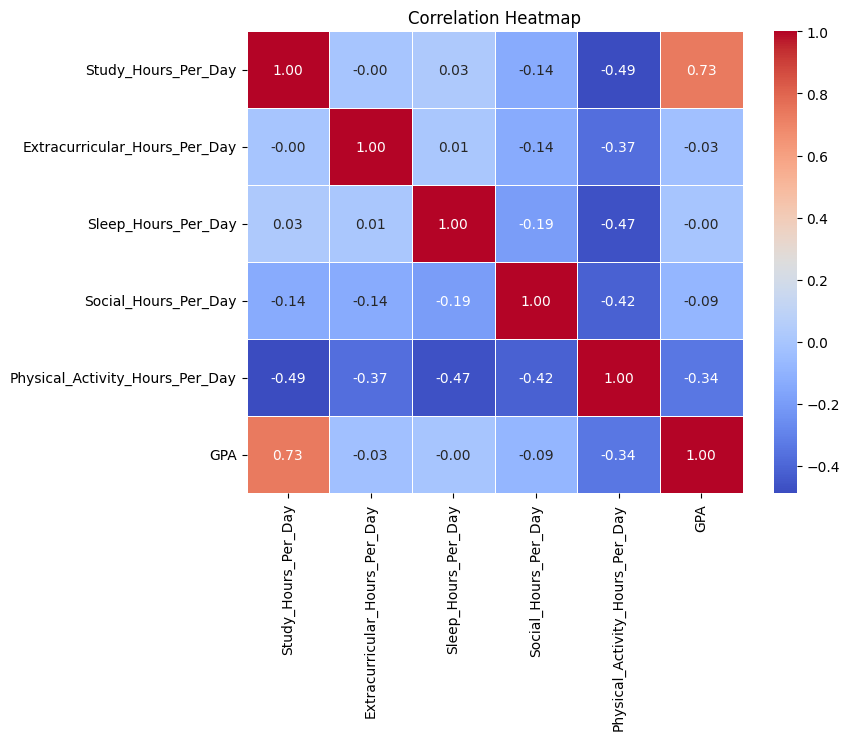

In [8]:

df_excluded = df.drop(columns=['Stress_Level'])  # Wyklucz kolumnę 'D'

corr_matrix = df_excluded.corr()

plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

Checking value counts of stress level

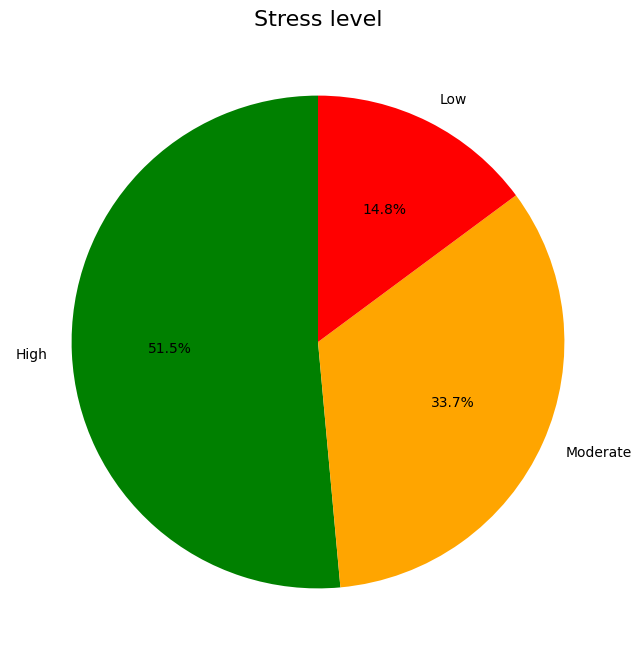

In [9]:
stress_counts = df['Stress_Level'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    stress_counts, 
    labels=stress_counts.index,  
    autopct='%1.1f%%',  
    colors=['green', 'orange', 'red'], 
    startangle=90,  
)

plt.title("Stress level", fontsize=16)

plt.show()


As we can see there is qutie high correlation between studying hours and GPA. Let's take a closer look.

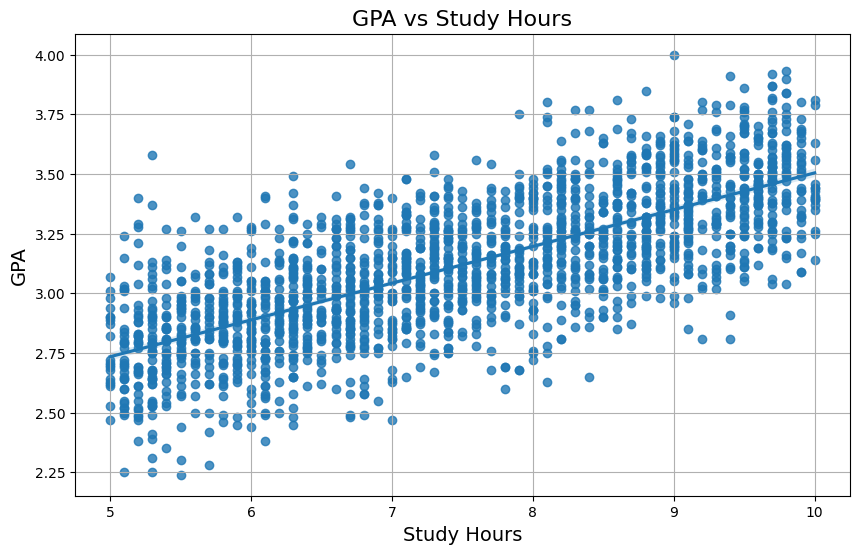

In [10]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df, 
    x='Study_Hours_Per_Day', 
    y='GPA',
)

# Dodanie tytułu i etykiet
plt.title("GPA vs Study Hours", fontsize=16)
plt.xlabel("Study Hours", fontsize=14)
plt.ylabel("GPA", fontsize=14)
plt.grid(True) 
plt.show()

There is a strong correlation between GPA and studying hours. Simply more studying hours higher GPA is. 

Divide the students which are having GPA over than mean.

As we know from previous graphs the biggest infulence on GPA are having studying hours. Let's check how is it comparing with stress level what we didn't check yet.

In [11]:
#as we know from previous graphs the biggest infulence on GPA are having studying hours. 
#so lets compare 

# then compare what is causing the stress what is making the relief 
#zajecia pozalekcyjne maja sens?

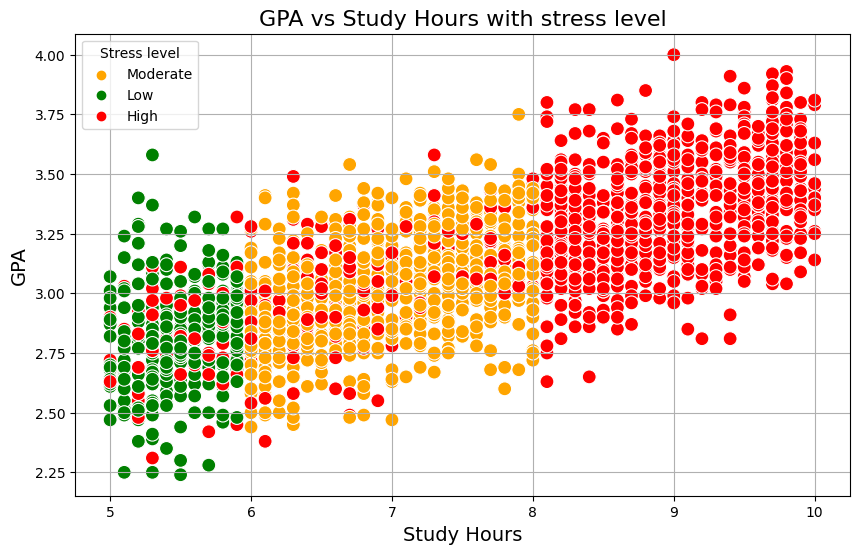

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Study_Hours_Per_Day', 
    y='GPA', 
    hue='Stress_Level',  
    palette={'Low': 'green', 'Moderate': 'orange', 'High': 'red'},  #Colour's palette depending on stress level
    s=100  
)

plt.title("GPA vs Study Hours with stress level", fontsize=16)
plt.xlabel("Study Hours", fontsize=14)
plt.ylabel("GPA", fontsize=14)
plt.legend(title="Stress level")
plt.grid(True) 
plt.show()

Even though students having high stress level are appearing all over the data, there is strong correlation between stress level and GPA and even stronger between stress level and Study hour  

Let's divide the students into two group: Low_GPA_Students and High_GPA_Students and check if actually High_GPA_Students are more stressed.

In [13]:
gpa_mean = df['GPA'].mean()
High_GPA_Students = df.loc[df['GPA']>gpa_mean]
Low_GPA_Students = df.loc[df['GPA']<=gpa_mean]
print(High_GPA_students.size[0],Low_GPA_students.size[0])

NameError: name 'High_GPA_students' is not defined

In [ ]:
stress_counts = best_students['Stress_Level'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    stress_counts, 
    labels=stress_counts.index,  
    autopct='%1.1f%%',  
    colors=['green', 'orange', 'red'], 
    startangle=90,  
)

# Tytuł wykresu
plt.title("Stress level", fontsize=16)

# Pokaż wykres
plt.show()


As far as we remember percentage of students having high stress level was 51.5% when for students with higher average its 74.6%

We already know that the students which are having higher GPA are more stressed but as we proved higher GPA is connected with more hours of studying. So students with higher GPA are more stressed because they have less time for other activities or because they dont have time to waste?  

Grouping students by more than average ...

Lets find out what is causing the stress. Study hours or free time or different activities or maybe low amount of sleep.

In [ ]:
#combining the time on social activity + sport activity to the stress level 
#combining the stress level to GPA 


In [ ]:
good_students_which_doesnt_sleep_much = df.loc[(df["Study_Hours_Per_Day"]>7.4758)
&(df['Sleep_Hours_Per_Day']<5.5)
]
good_students_which_doesnt_sleep_much.head()

In [ ]:
#is in
low_stress_students = df.loc[df['Stress_Level'].isin(['Low', 'Moderate'])]
low_stress_students.head()

In [ ]:
sleep_mean = df['Sleep_Hours_Per_Day'].mean()
activity_mean = df['Physical_Activity_Hours_Per_Day'].mean()
social_mean = df['Social_Hours_Per_Day'].mean()
study_mean = df['Study_Hours_Per_Day'].mean()
def stars(row):
    i = 0
    if row['Sleep_Hours_Per_Day']>sleep_mean:
        i += 1
    if row['Physical_Activity_Hours_Per_Day']>activity_mean:
        i += 1
    if row['Social_Hours_Per_Day']>social_mean:
        i += 1
    if row['Study_Hours_Per_Day']>study_mean:
        i += 1
    return i
    
df['stars'] = df.apply(stars, axis='columns')
df['stars'].value_counts().idxmax()

In [ ]:
sleep_is_null = df.loc[df['Sleep_Hours_Per_Day']<5]
sleep_is_null

In [ ]:
df.describe()

In [ ]:
df['Busy_Time'] = df['Study_Hours_Per_Day']+df['Extracurricular_Hours_Per_Day']+df['Physical_Activity_Hours_Per_Day']
df['Freetime'] = 24-(df['Study_Hours_Per_Day']+df['Extracurricular_Hours_Per_Day']+df['Sleep_Hours_Per_Day']+df['Physical_Activity_Hours_Per_Day'])

In [ ]:
df['Freetime'].max()

In [ ]:
df['Stress_Level'].value_counts()

In [ ]:
groupby = df.groupby('GPA')['Study_Hours_Per_Day'].agg([len,min,max])

In [ ]:
df['Extracurricular_Hours_Per_Day'].value_counts().idxmax()

In [ ]:
x = df['Sleep_Hours_Per_Day']
y = df['Stress_Level']
plt.scatter(x,y)
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('Stress')
plt.show()

In [ ]:
x = df['Freetime']
y = df['Stress_Level']
plt.scatter(x,y)
plt.xlabel('Freetime')
plt.ylabel('Stress')
plt.show()

In [ ]:
df.isnull().sum()